## Model and prediction together

Good ref:   
    https://towardsdatascience.com/application-of-rnn-for-customer-review-sentiment-analysis-178fa82e9aaf

In [100]:
import keras
print(keras.__version__)

import tensorflow as tf
print(tf.__version__)

2.2.4
1.11.0


## Lazada test data

In [1]:
import pandas as pd

df = pd.read_csv("lazada_labelled.csv")
df2 = df[["review", "sentiment"]]
df2.head()

,review,sentiment
0,Received item really fast. item was genuine an...,1
1,Super fast delivery and item looks exactly lik...,1
2,A bit picky...need to wear inner layer before ...,0
3,Definitely will recommend to others,1
4,Material is good recommended,1


## Mongodb predict data

In [2]:
from pymongo import MongoClient
import pandas as pd
from bson.objectid import ObjectId

client = MongoClient()
db = client.seasalt
collection = db.shopee

# test
test = collection.find({"$and": [{"product_breadcrumb": "Women's Apparel"}, {"product_review":{"$ne":[] }}]}, {"product_name": 1, "product_breadcrumb": 1, "product_id": 1, "product_review": 1})
data2 = []
for x in test:
    data2.append(x)
len(data2)

6696

# top 10 products

In [3]:

ll = [len(x['product_review']) for x in data2]
idx = sorted(range(len(ll)), reverse = True, key=ll.__getitem__)[:10]
print(idx)

amt = sorted(ll, reverse = True)[:10]
print(amt)

prd = [data2[x]['product_name'] for x in idx]
# print(prd)
for i in range(len(prd)):
    print(i+1, " ", prd[i], "")

[2188, 2194, 2128, 2101, 5566, 2147, 5484, 4585, 2109, 4551]
[2078, 694, 689, 594, 529, 462, 295, 256, 237, 196]
1   READY STOCK ！ oversized tee basic t-shirts koreanfashion simple white blouse 
2   Ready STOCK！hot sale loose short sleeves show slim summer girl 
3   [READY STOCK] (Best Seller!!) JYUNEESG'S Loose fit Basic High Neck TOP 
4   7 color optional Ready Stock！Retro Loose Speaker Sleeve Round Long Sleeve TShirt 
5   ⭐️BUY 4 FREE 1⭐️MUNAFIE SEAMLESS SLIMMING PANTIES⭐️ 
6   White shirt female long sleeve han fan wide loose south Korean shirt 
7   Silicone Nipple Cover Sticker Pads Shields Guard for Gown 
8   MONTIFS Strap Culottes - Multi Color 
9   [READY STOK] BL-B-06 Knitted Turtle Neck T-Shirt Top 
10   ✨HOT Women Warm Winter Thick Footless Tights Skinny Slim Leggings Stretch Pants 


In [53]:
df_len = pd.Series(ll)
df_len.shape

(6696,)

In [55]:
df_len[df_len>=20].shape

(408,)

## Get review from top 10 

In [7]:
tmp = data2[4551]

In [11]:
tmp.keys()

dict_keys(['_id', 'product_review', 'product_breadcrumb', 'product_name', 'product_id'])

In [43]:
tmp['product_id']

'220762495'

In [12]:
tmp['product_review'][100]

{'buyer_name': 'jacquelinek',
 'buyer_rating': 0,
 'buyer_review': 'Poor product quality',
 'product_variant': 'black',
 'review_date': '2017-11-18 23:35'}

In [14]:
data_out = []
for i in idx:
    data_out.append(data2[i])
len(data_out)    

10

In [16]:
len(data_out[2]['product_review'])

689

In [17]:
type(data_out)

list

In [19]:
import pickle

with open('shopee_review_top10.pkl', 'wb') as f:
    pickle.dump(data_out, f)

In [ ]:
with open('shopee_review_top10.pkl', 'rb') as f:
    data_in = pickle.load(f)

## Products #review >= 20

In [3]:
data_out = []
for i in range(len(data2)):
    if(len(data2[i]['product_review']) >= 20):
        data_out.append(data2[i])
len(data_out)   

408

In [59]:
with open('shopee_review_20more.pkl', 'wb') as f:
    pickle.dump(data_out, f)

In [63]:
for i in range(10):
    print(data_out[i]['product_name'], len(data_out[i]['product_review']))

ZANZEA 2017 Rompers Women Jumpsuits Plus Size Retro Full Length overall 1 22
Sweet Wifey/Hubby Print Cotton Couple Wear T-shirt (One Piece Price) (S-3XL) 47
✿ Vintage Dress Loose Casual O-Neck 3/4 Sleeve Print Summer Women in Navy Blue 70
✿ Stylish Lady Women's New Fashion Long Sleeve Lapel Plaid Sexy Dress 23
Women Sleeveless Geometric Floral Shift Dress Mini Dress Party Dress 30
Elastic Tube Mini Dress Strapless Stretch Tight Body-con Seamless One Size 20
Fashion Women Summer Boho Half Sleeve Evening Cocktail Party Beach Dress 21
Push Up  Bra and panty Set (LA3094) 23
Modal Laced Hipster Panties in 12 Candy Colors 38
Fashion Sexy Woman Lady Tank Strapless Tops Strap Padded Backless Lace bra 35


In [6]:
data_out[5].keys()

dict_keys(['_id', 'product_id', 'product_name', 'product_breadcrumb', 'product_review'])

In [16]:
pid = []
p_name = []
date = []
review = []
buyer = []

for dat in data_out:
    for rev in dat['product_review']:
        pid.append(dat['product_id'])
        p_name.append(dat['product_name'])
        date.append(rev['review_date'])
        buyer.append(rev['buyer_name'])
        review.append(rev['buyer_review'])
        
# print(len(pid), len(date), len(review), len(buyer))   

shopee = pd.DataFrame({
    'pid': pid,
    'pname': p_name,
    'date': date,
    'buyer': buyer,
    'review': review
})
print(shopee.shape)
shopee.head()

(24589, 5)


,buyer,date,pid,pname,review
0,mrsshah84,2018-04-23 20:08,521024052,ZANZEA 2017 Rompers Women Jumpsuits Plus Size ...,
1,adrianazxcs,2018-04-16 19:59,521024052,ZANZEA 2017 Rompers Women Jumpsuits Plus Size ...,Good product quality
2,kamini2311,2018-04-14 16:02,521024052,ZANZEA 2017 Rompers Women Jumpsuits Plus Size ...,Good product quality
3,jojoandlove,2018-04-10 22:28,521024052,ZANZEA 2017 Rompers Women Jumpsuits Plus Size ...,The colour was 3-4 tones lighter than in pictu...
4,feezah25,2018-04-05 18:09,521024052,ZANZEA 2017 Rompers Women Jumpsuits Plus Size ...,Good product quality Fast delivery Excellent s...


In [17]:
shopee = shopee[shopee.review != '']
shopee.shape

(13544, 5)

In [6]:
shopee['sentiment'] = 0
shop2 = shopee.loc[:,['review', 'sentiment']].copy()
shop2.head()

,review,sentiment
1,Good product quality,0
2,Good product quality,0
3,The colour was 3-4 tones lighter than in pictu...,0
4,Good product quality Fast delivery Excellent s...,0
5,"Product quality is ok, size are too big",0


# Training data preprocess

In [7]:
import pandas as pd

data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', usecols = ['Review Text', 'Recommended IND'])
data.columns = ['review', 'sentiment']
# remove nan
data.dropna(inplace = True)
print(data.shape)
data.head()

(22641, 2)


,review,sentiment
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [21]:
# imbalance
data['sentiment'].value_counts() / data.shape[0]

1    0.818868
0    0.181132
Name: sentiment, dtype: float64

# Combine all data together

In [8]:
n1 = data.shape[0]
n2 = df2.shape[0]
n3 = shop2.shape[0]
dfa = pd.concat([data, df2, shop2], ignore_index=True)
print(n1, n2, n3)
print(dfa.shape)

22641 334 13544
(36519, 2)


In [9]:
import string
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    # text = text.lower().split()
    
    ## Remove stop words
    # stops = set(stopwords.words("english"))
    # text = [w for w in text if not w in stops and len(w) >= 3]
    
    # text = " ".join(text)
    
    ## Stemming
    text = text.lower().split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    
    # other
    text = re.sub(r'[^a-zA-Z]',' ',text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"so{2,}", "so", text)
    
    return text

In [12]:
# before
dfa.review[36000:36005].tolist()

['Good product quality Fast delivery Excellent service by seller',
 'the black one is super pretty!! but regret getting the white one.. it is too sheer & cant wear it out :(',
 'Fast delivery',
 'fast delivery!! & rly love the material :-)',
 'Fast delivery. Good product quality']

In [10]:
# after, keep stop words 
dfa['review'] = dfa['review'].map(lambda x: clean_text(x))
dfa.review[:5].tolist()

['absolut wonder silki and sexi and comfort',
 'love this dress it so pretty i happen to find it in a store and i m glad i did bc i never would have order it onlin bc it petite i bought a petit and am i love the length on me hit just a littl below the knee would definit be a true midi on someon who is truli petite ',
 'i had such high hope for this dress and realli want it to work for me i initi order the petit small mi usual size but i found this to be outrag small so small in fact that i could not zip it up i reorder it in petit medium which was just ok overall the top half was comfort and fit nicely but the bottom half had a veri tight under layer and sever somewhat cheap net over layers imo a major design flaw was the net over layer sewn direct into the zipper it c',
 'i love love love this jumpsuit it fun flirty and fabulous everi time i wear it i get noth but great compliments ',
 'this shirt is veri flatter to all due to the adjust front tie it is the perfect length to wear with

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# max_fatures = 5000
mlen = 100

# tokenizer = Tokenizer(num_words=max_fatures, lower=True,split=' ')
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(dfa['review'].values)
vocabulary_size = len(tokenizer.word_counts.keys())+1
print(vocabulary_size)

X = tokenizer.texts_to_sequences(dfa['review'].values)
X = pad_sequences(X, maxlen=mlen, padding='post')
Y = pd.get_dummies(dfa['sentiment']).values

# trian/valid/test: 2/1/1
X_train, X_valid, Y_train, Y_valid = train_test_split(X[:n1],Y[:n1], test_size = 0.25, random_state = 36)
print(X_train.shape)
print(X_valid.shape)

/Users/qy/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


13396
(16980, 100)
(5661, 100)


In [26]:
X.shape

(36519, 100)

In [92]:
import numpy as np
print(np.sum(Y_valid[:,1]) / Y_valid.shape[0])

0.8252958841194136


In [203]:
X[10:15,:11]

array([[  17,   89,   51, 2828,  361,    1,  444,  283, 3167,    2,   48],
       [   7,   17,    6, 1311,   16,  139,    4,  153,    0,    0,    0],
       [  59,    4,   59,    2,  211,  546, 7773,   11,    1,  149, 2671],
       [  80,    1,  132,  110,    8,   95,  274,    1, 6118, 1275,   17],
       [   7,    6,    5,   61, 1452,   12,  872, 5190,    2,   34,   24]],
      dtype=int32)

## Sentiment model cnn after lstm v2 (as model in the report)   
ref: http://konukoii.com/blog/2018/02/19/twitter-sentiment-analysis-using-combined-lstm-cnn-models/

In [93]:
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

max_fatures = vocabulary_size
embed_dim = 64
batch_size = 128

model_conv3 = Sequential()
model_conv3.add(Embedding(max_fatures, embed_dim, input_length = mlen))
model_conv3.add(Dropout(0.2))
model_conv3.add(Conv1D(64, 5, activation='relu'))
model_conv3.add(MaxPooling1D(pool_size=4))
model_conv3.add(LSTM(128,dropout=0.4, recurrent_dropout=0.2, return_sequences=True))
model_conv3.add(LSTM(128,dropout=0.5, recurrent_dropout=0.2))
# model_conv3.add(Flatten())
# model_conv3.add(Dropout(0.2))
model_conv3.add(Dense(2, activation='softmax'))
model_conv3.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model_conv3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 64)           857344    
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 64)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 96, 64)            20544     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 24, 128)           98816     
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 258       
Total para

In [94]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopper = EarlyStopping(patience=3, verbose=1)
# checkpointer = ModelCheckpoint('model-lstm-new.h5', verbose=1, save_best_only=True)

model_conv3.fit(X_train, Y_train, validation_split=0.33, batch_size=batch_size, epochs=10, verbose = 1, 
                    callbacks=[earlystopper])

loss, acc = model_conv3.evaluate(X_valid, Y_valid, verbose = 1, batch_size = batch_size)
print()
print("loss: %.3f" % (loss))
print("acc: %.3f" % (acc))

Train on 11376 samples, validate on 5604 samples
Epoch 1/10
11376/11376 [==============================] - 46s 4ms/step - loss: 0.4875 - acc: 0.8105 - val_loss: 0.3827 - val_acc: 0.8314
Epoch 2/10
11376/11376 [==============================] - 41s 4ms/step - loss: 0.3070 - acc: 0.8680 - val_loss: 0.2565 - val_acc: 0.8906
Epoch 3/10
11376/11376 [==============================] - 47s 4ms/step - loss: 0.2269 - acc: 0.9087 - val_loss: 0.2499 - val_acc: 0.8956
Epoch 4/10
11376/11376 [==============================] - 50s 4ms/step - loss: 0.1877 - acc: 0.9233 - val_loss: 0.2739 - val_acc: 0.8920
Epoch 5/10
11376/11376 [==============================] - 39s 3ms/step - loss: 0.1549 - acc: 0.9414 - val_loss: 0.2781 - val_acc: 0.8876
Epoch 6/10
11376/11376 [==============================] - 41s 4ms/step - loss: 0.1311 - acc: 0.9514 - val_loss: 0.2997 - val_acc: 0.8806
Epoch 00006: early stopping
5661/5661 [==============================] - 6s 1ms/step

loss: 0.295
acc: 0.879


## Model bi-LSTM 
ref: https://www.kaggle.com/c/movie-review-sentiment-analysis-kernels-only/kernels

In [13]:
from keras.layers import Bidirectional, LSTM
from keras.models import Sequential
from keras.layers import Dense, Embedding, SpatialDropout1D, Dropout

# try larger dim?
embed_dim = 64
max_fatures = vocabulary_size

model4 = Sequential()
model4.add(Embedding(max_fatures, embed_dim, input_length=X.shape[1]))
model4.add(SpatialDropout1D(0.2))
model4.add(Bidirectional(LSTM(100)))
model4.add(Dropout(0.2))
model4.add(Dense(2, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           857344    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 64)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               132000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 402       
Total params: 989,746
Trainable params: 989,746
Non-trainable params: 0
_________________________________________________________________


In [14]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

batch_size = 256

earlystopper = EarlyStopping(patience=3, verbose=1)
checkpointer = ModelCheckpoint('model-lstm.h5', verbose=1, save_best_only=True)

model4.fit(X_train, Y_train, validation_split=0.33, batch_size=batch_size, epochs=10, verbose = 2, 
                    callbacks=[earlystopper, checkpointer])

loss, acc = model4.evaluate(X_valid, Y_valid, verbose = 1, batch_size = batch_size)
print("loss: %.3f" % (loss))
print("acc: %.3f" % (acc))

Train on 11376 samples, validate on 5604 samples
Epoch 1/10
 - 78s - loss: 0.4968 - acc: 0.8107 - val_loss: 0.4059 - val_acc: 0.8233

Epoch 00001: val_loss improved from inf to 0.40589, saving model to model-lstm.h5
Epoch 2/10
 - 72s - loss: 0.3371 - acc: 0.8459 - val_loss: 0.2847 - val_acc: 0.8746

Epoch 00002: val_loss improved from 0.40589 to 0.28470, saving model to model-lstm.h5
Epoch 3/10
 - 69s - loss: 0.2427 - acc: 0.8987 - val_loss: 0.2688 - val_acc: 0.8903

Epoch 00003: val_loss improved from 0.28470 to 0.26883, saving model to model-lstm.h5
Epoch 4/10
 - 67s - loss: 0.1989 - acc: 0.9183 - val_loss: 0.2790 - val_acc: 0.8919

Epoch 00004: val_loss did not improve from 0.26883
Epoch 5/10
 - 72s - loss: 0.1721 - acc: 0.9316 - val_loss: 0.2906 - val_acc: 0.8812

Epoch 00005: val_loss did not improve from 0.26883
Epoch 6/10
 - 74s - loss: 0.1465 - acc: 0.9414 - val_loss: 0.3292 - val_acc: 0.8908

Epoch 00006: val_loss did not improve from 0.26883
Epoch 00006: early stopping
5661/5

## TextCNN   
ref: https://zhuanlan.zhihu.com/p/29201491

In [82]:
from keras.layers.merge import concatenate
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Activation, merge, Input

# 模型结构：词嵌入-卷积池化*3-拼接-全连接-dropout-全连接
main_input = Input(shape=(mlen,), dtype='float64')
# 词嵌入（使用预训练的词向量）
embed = Embedding(max_fatures, embed_dim, input_length=X.shape[1])(main_input)
# 词窗大小分别为3,4,5
cnn1 = Conv1D(256, 3, padding='same', strides = 1, activation='relu')(embed)
cnn1 = MaxPooling1D(pool_size=4)(cnn1)
cnn2 = Conv1D(256, 4, padding='same', strides = 1, activation='relu')(embed)
cnn2 = MaxPooling1D(pool_size=4)(cnn2)
cnn3 = Conv1D(256, 5, padding='same', strides = 1, activation='relu')(embed)
cnn3 = MaxPooling1D(pool_size=4)(cnn3)
# 合并三个模型的输出向量
cnn = concatenate([cnn1,cnn2,cnn3], axis=-1)
flat = Flatten()(cnn)
drop = Dropout(0.2)(flat)
main_output = Dense(2, activation='softmax')(drop)

model = Model(inputs = main_input, outputs = main_output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 100, 64)      857344      input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 100, 256)     49408       embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 100, 256)     65792       embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_6 (

In [83]:
batch_size = 256
earlystopper = EarlyStopping(patience=3, verbose=1)
model.fit(X_train, Y_train, validation_split=0.33, batch_size=batch_size, epochs=10, verbose = 1, 
                    callbacks=[earlystopper])

loss, acc = model.evaluate(X_valid, Y_valid, verbose = 1, batch_size = batch_size)
print()
print("loss: %.3f" % (loss))
print("acc: %.3f" % (acc))

Train on 11376 samples, validate on 5604 samples
Epoch 1/10
11376/11376 [==============================] - 33s 3ms/step - loss: 0.4819 - acc: 0.7988 - val_loss: 0.4061 - val_acc: 0.8233
Epoch 2/10
11376/11376 [==============================] - 33s 3ms/step - loss: 0.3380 - acc: 0.8403 - val_loss: 0.2789 - val_acc: 0.8831
Epoch 3/10
11376/11376 [==============================] - 36s 3ms/step - loss: 0.2216 - acc: 0.9059 - val_loss: 0.2620 - val_acc: 0.8928
Epoch 4/10
11376/11376 [==============================] - 32s 3ms/step - loss: 0.1626 - acc: 0.9335 - val_loss: 0.2788 - val_acc: 0.8953
Epoch 5/10
11376/11376 [==============================] - 34s 3ms/step - loss: 0.1193 - acc: 0.9540 - val_loss: 0.3139 - val_acc: 0.8885
Epoch 6/10
11376/11376 [==============================] - 35s 3ms/step - loss: 0.0828 - acc: 0.9709 - val_loss: 0.3620 - val_acc: 0.8860
Epoch 00006: early stopping
5661/5661 [==============================] - 4s 651us/step

loss: 0.356
acc: 0.883


## CNN+RNN

In [86]:
from keras.layers import GRU

main_input = Input(shape=(mlen,), dtype='float64')
embed = Embedding(max_fatures, embed_dim, input_length=X.shape[1])(main_input)
cnn = Conv1D(256, 3, padding='same', strides = 1, activation='relu')(embed)
cnn = MaxPooling1D(pool_size=4)(cnn)
cnn = Flatten()(cnn)
cnn = Dense(128)(cnn)
rnn = Bidirectional(GRU(256, dropout=0.2, recurrent_dropout=0.1))(embed)
rnn = Dense(128)(rnn)
con = concatenate([cnn,rnn], axis=-1)
main_output = Dense(2, activation='softmax')(con)

model2 = Model(inputs = main_input, outputs = main_output)
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 100, 64)      857344      input_6[0][0]                    
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 100, 256)     49408       embedding_8[0][0]                
__________________________________________________________________________________________________
max_pooling1d_7 (MaxPooling1D)  (None, 25, 256)      0           conv1d_9[0][0]                   
__________________________________________________________________________________________________
flatten_5 

In [87]:
batch_size = 256
earlystopper = EarlyStopping(patience=3, verbose=1)

model2.fit(X_train, Y_train, validation_split=0.33, batch_size=batch_size, epochs=10, verbose = 1, 
                    callbacks=[earlystopper])

loss, acc = model2.evaluate(X_valid, Y_valid, verbose = 1, batch_size = batch_size)
print()
print("Testing:")
print("loss: %.3f" % (loss))
print("acc: %.3f" % (acc))

Train on 11376 samples, validate on 5604 samples
Epoch 1/10
11376/11376 [==============================] - 135s 12ms/step - loss: 0.4601 - acc: 0.8041 - val_loss: 0.3486 - val_acc: 0.8446
Epoch 2/10
11376/11376 [==============================] - 132s 12ms/step - loss: 0.2859 - acc: 0.8761 - val_loss: 0.2746 - val_acc: 0.8856
Epoch 3/10
11376/11376 [==============================] - 132s 12ms/step - loss: 0.2054 - acc: 0.9157 - val_loss: 0.2908 - val_acc: 0.8824
Epoch 4/10
11376/11376 [==============================] - 132s 12ms/step - loss: 0.1394 - acc: 0.9444 - val_loss: 0.3184 - val_acc: 0.8833
Epoch 5/10
11376/11376 [==============================] - 132s 12ms/step - loss: 0.0904 - acc: 0.9674 - val_loss: 0.4237 - val_acc: 0.8849
Epoch 00005: early stopping
5661/5661 [==============================] - 19s 3ms/step

Testing:
loss: 0.426
acc: 0.880


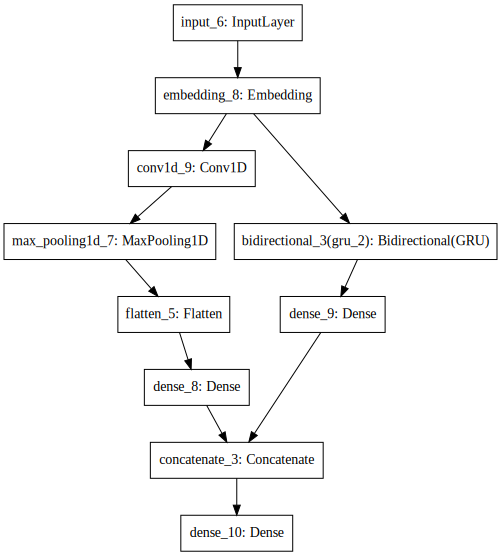

In [101]:
import pydot
from IPython.display import SVG
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

plot_model(model2, to_file='graph_rnn.png')
SVG(model_to_dot(model2).create(prog='dot', format='svg'))

### Attention model  
https://www.kaggle.com/takuok/bidirectional-lstm-and-attention-lb-0-043

In [102]:
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints


class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim        

In [106]:
inp = Input(shape=(mlen, ))
x = Embedding(max_fatures, embed_dim, input_length=X.shape[1])(inp)
x = Bidirectional(LSTM(128, return_sequences=True, dropout=0.25,
                       recurrent_dropout=0.25))(x)
x = Attention(mlen)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(2, activation="softmax")(x)
model5 = Model(inputs=inp, outputs=x)

model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 100)               0         
_________________________________________________________________
embedding_12 (Embedding)     (None, 100, 64)           857344    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 100, 256)          197632    
_________________________________________________________________
attention_3 (Attention)      (None, 256)               356       
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 258       
Total para

In [107]:
batch_size = 256
earlystopper = EarlyStopping(patience=3, verbose=1)

model5.fit(X_train, Y_train, validation_split=0.33, batch_size=batch_size, epochs=10, verbose = 1, 
                    callbacks=[earlystopper])

loss, acc = model5.evaluate(X_valid, Y_valid, verbose = 1, batch_size = batch_size)

print()
print("loss: %.3f" % (loss))
print("acc: %.3f" % (acc))

Train on 11376 samples, validate on 5604 samples
Epoch 1/10
11376/11376 [==============================] - 103s 9ms/step - loss: 0.5108 - acc: 0.8057 - val_loss: 0.4468 - val_acc: 0.8233
Epoch 2/10
11376/11376 [==============================] - 92s 8ms/step - loss: 0.3802 - acc: 0.8355 - val_loss: 0.3151 - val_acc: 0.8767
Epoch 3/10
11376/11376 [==============================] - 92s 8ms/step - loss: 0.2559 - acc: 0.8899 - val_loss: 0.2529 - val_acc: 0.8940
Epoch 4/10
11376/11376 [==============================] - 92s 8ms/step - loss: 0.2081 - acc: 0.9169 - val_loss: 0.2536 - val_acc: 0.8892
Epoch 5/10
11376/11376 [==============================] - 92s 8ms/step - loss: 0.1780 - acc: 0.9296 - val_loss: 0.2576 - val_acc: 0.8940
Epoch 6/10
11376/11376 [==============================] - 94s 8ms/step - loss: 0.1528 - acc: 0.9410 - val_loss: 0.2861 - val_acc: 0.8936
Epoch 00006: early stopping
5661/5661 [==============================] - 13s 2ms/step

loss: 0.293
acc: 0.889


## ROC curve on Testing data

In [99]:
from sklearn import metrics

pred3 = model_conv3.predict(X_valid, batch_size=256, verbose = 1)
y_pred_proba = pred3[:, 1]
auc = metrics.roc_auc_score(Y_valid[:, 1], y_pred_proba)
print(auc)

5661/5661 [==============================] - 5s 957us/step
0.9092195226255939


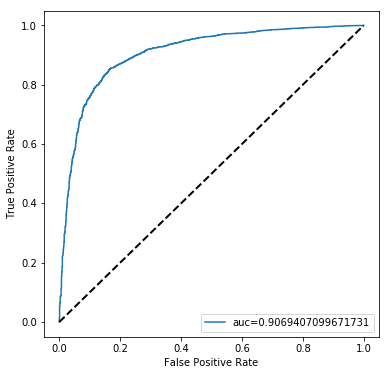

In [72]:
import matplotlib.pyplot as plt

y_pred_proba = pred3[:, 1]
y_test = Y_valid[:, 1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

## lazada data performance

In [96]:
loss, acc = model.evaluate(X[n1:(n1+n2),:], Y[n1:(n1+n2),:], verbose = 1, batch_size = batch_size)
print("acc: %.3f" % (acc))

loss, acc = model2.evaluate(X[n1:(n1+n2),:], Y[n1:(n1+n2),:], verbose = 1, batch_size = batch_size)
print("acc: %.3f" % (acc))

loss, acc = model_conv3.evaluate(X[n1:(n1+n2),:], Y[n1:(n1+n2),:], verbose = 1, batch_size = batch_size)
print("acc: %.3f" % (acc))

loss, acc = model4.evaluate(X[n1:(n1+n2),:], Y[n1:(n1+n2),:], verbose = 1, batch_size = batch_size)
print("acc: %.3f" % (acc))

334/334 [==============================] - 0s 859us/step
acc: 0.859
334/334 [==============================] - 1s 4ms/step
acc: 0.868
334/334 [==============================] - 0s 835us/step
acc: 0.826
334/334 [==============================] - 1s 2ms/step
acc: 0.835


In [108]:
loss, acc = model5.evaluate(X[n1:(n1+n2),:], Y[n1:(n1+n2),:], verbose = 1, batch_size = batch_size)
print("acc: %.3f" % (acc))

334/334 [==============================] - 1s 3ms/step
acc: 0.850


In [73]:
pred = model4.predict(X[n1:(n1+n2),:], batch_size=8,verbose = 1)
y_pred_proba = pred[:, 1]
auc = metrics.roc_auc_score(Y[n1:(n1+n2), 1], y_pred_proba)
print(auc)

334/334 [==============================] - 2s 5ms/step
0.7115987460815048


In [53]:
sum(Y[n1:(n1+n2), 1]) / n2

0.8682634730538922

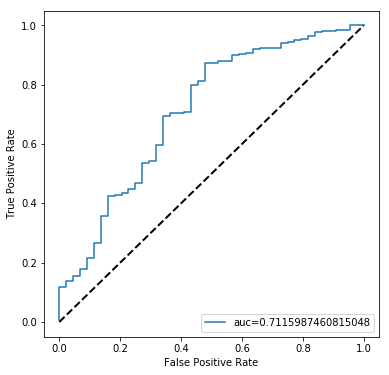

In [74]:
y_pred_proba = pred[:, 1]
y_test = Y[n1:(n1+n2), 1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

## Predict sentiment on all rest

In [18]:
pred_f = model4.predict(X[(n1+n2):], batch_size=128,verbose = 1)
pred_prob = pred_f[:, 1]
pred_prob[:10]

13544/13544 [==============================] - 24s 2ms/step


array([0.5506865, 0.5506865, 0.9969813, 0.9942392, 0.5871868, 0.9914289,
       0.9942392, 0.9940257, 0.9035721, 0.9942392], dtype=float32)

In [19]:
shopee['sentiment'] = [round(i, 4) for i in pred_prob.tolist()]
shopee.head()

,buyer,date,pid,pname,review,sentiment
1,adrianazxcs,2018-04-16 19:59,521024052,ZANZEA 2017 Rompers Women Jumpsuits Plus Size ...,Good product quality,0.5507
2,kamini2311,2018-04-14 16:02,521024052,ZANZEA 2017 Rompers Women Jumpsuits Plus Size ...,Good product quality,0.5507
3,jojoandlove,2018-04-10 22:28,521024052,ZANZEA 2017 Rompers Women Jumpsuits Plus Size ...,The colour was 3-4 tones lighter than in pictu...,0.9970
4,feezah25,2018-04-05 18:09,521024052,ZANZEA 2017 Rompers Women Jumpsuits Plus Size ...,Good product quality Fast delivery Excellent s...,0.9942
5,fredjo,2018-04-05 18:04,521024052,ZANZEA 2017 Rompers Women Jumpsuits Plus Size ...,"Product quality is ok, size are too big",0.5872


In [20]:
shopee.to_csv('shopee_pred.csv')

### Aggregate prediction results

In [23]:
shopee['date2'] = shopee['date'].apply(lambda x: x[:10])
shopee['date2'][:5]

1    2018-04-16
2    2018-04-14
3    2018-04-10
4    2018-04-05
5    2018-04-05
Name: date2, dtype: object

In [31]:
shop_sub = shopee.groupby(['pname'])['date2'].count().sort_values(ascending=False)
shop_sub.head(5)

pname
READY STOCK ！ oversized tee basic t-shirts koreanfashion simple white blouse        967
Ready STOCK！hot sale loose short sleeves show slim summer girl                      364
⭐️BUY 4 FREE 1⭐️MUNAFIE SEAMLESS SLIMMING PANTIES⭐️                                 344
[READY STOCK] (Best Seller!!) JYUNEESG'S Loose fit Basic High Neck TOP              317
7 color optional Ready Stock！Retro Loose Speaker Sleeve Round Long Sleeve TShirt    299
Name: date2, dtype: int64

In [49]:
shop = shopee.groupby(['pname', 'date2'])['sentiment'].mean().reset_index()
shop['sentiment'] = [round(i, 4) for i in shop['sentiment'].tolist()]

shop.head()

,pname,date2,sentiment
0,#IQ791 MYLA'S CRISS CROSS TIE FRONT KNIT V NEC...,2017-10-12,0.5458
1,#IQ791 MYLA'S CRISS CROSS TIE FRONT KNIT V NEC...,2017-10-16,0.9942
2,#IQ791 MYLA'S CRISS CROSS TIE FRONT KNIT V NEC...,2017-10-18,0.9890
3,#IQ791 MYLA'S CRISS CROSS TIE FRONT KNIT V NEC...,2017-10-23,0.9578
4,#IQ791 MYLA'S CRISS CROSS TIE FRONT KNIT V NEC...,2017-10-27,0.5507


In [52]:
plist = shop_sub.index.tolist()[:10]
print(plist)

df = shop[shop['pname'].isin(plist)]
df.head()

['READY STOCK ！ oversized tee basic t-shirts koreanfashion simple white blouse', 'Ready STOCK！hot sale loose short sleeves show slim summer girl', '⭐️BUY 4 FREE 1⭐️MUNAFIE SEAMLESS SLIMMING PANTIES⭐️', "[READY STOCK] (Best Seller!!) JYUNEESG'S Loose fit Basic High Neck TOP", '7 color optional Ready Stock！Retro Loose Speaker Sleeve Round Long Sleeve TShirt', 'White shirt female long sleeve han fan wide loose south Korean shirt', 'MONTIFS Strap Culottes - Multi Color', 'Silicone Nipple Cover Sticker Pads Shields Guard for Gown', '[READY STOK] BL-B-06 Knitted Turtle Neck T-Shirt Top', '✨HOT Women Warm Winter Thick Footless Tights Skinny Slim Leggings Stretch Pants']


,pname,date2,sentiment
388,7 color optional Ready Stock！Retro Loose Speak...,2017-10-27,0.9871
389,7 color optional Ready Stock！Retro Loose Speak...,2017-10-31,0.6664
390,7 color optional Ready Stock！Retro Loose Speak...,2017-11-05,0.9987
391,7 color optional Ready Stock！Retro Loose Speak...,2017-11-06,0.8939
392,7 color optional Ready Stock！Retro Loose Speak...,2017-11-07,0.7161


In [45]:
df['pname'].value_counts()

[READY STOCK] (Best Seller!!) JYUNEESG'S Loose fit Basic High Neck TOP              205
READY STOCK ！ oversized tee basic t-shirts koreanfashion simple white blouse        205
Ready STOCK！hot sale loose short sleeves show slim summer girl                      162
White shirt female long sleeve han fan wide loose south Korean shirt                138
⭐️BUY 4 FREE 1⭐️MUNAFIE SEAMLESS SLIMMING PANTIES⭐️                                 132
MONTIFS Strap Culottes - Multi Color                                                116
7 color optional Ready Stock！Retro Loose Speaker Sleeve Round Long Sleeve TShirt    115
Silicone Nipple Cover Sticker Pads Shields Guard for Gown                           104
[READY STOK] BL-B-06 Knitted Turtle Neck T-Shirt Top                                 83
✨HOT Women Warm Winter Thick Footless Tights Skinny Slim Leggings Stretch Pants      62
Name: pname, dtype: int64

In [68]:
# out = []
out = {}

for pid in plist:
    
    dates = df[df.pname == pid]['date2'].tolist()
    prices = df[df.pname == pid]['sentiment'].tolist()
    dict_tmp = {
        'date': dates,
        'score': prices
    }
    
    text = re.sub(r'[^a-zA-Z0-9\[\]\-\s\(\)\!]','', pid)
    out[text] = dict_tmp
    # out.append(dict_tmp)
    
print(len(out))

10


In [69]:
out.keys()

dict_keys(['READY STOCK  oversized tee basic t-shirts koreanfashion simple white blouse', 'Ready STOCKhot sale loose short sleeves show slim summer girl', 'BUY 4 FREE 1MUNAFIE SEAMLESS SLIMMING PANTIES', '[READY STOCK] (Best Seller!!) JYUNEESGS Loose fit Basic High Neck TOP', '7 color optional Ready StockRetro Loose Speaker Sleeve Round Long Sleeve TShirt', 'White shirt female long sleeve han fan wide loose south Korean shirt', 'MONTIFS Strap Culottes - Multi Color', 'Silicone Nipple Cover Sticker Pads Shields Guard for Gown', '[READY STOK] BL-B-06 Knitted Turtle Neck T-Shirt Top', 'HOT Women Warm Winter Thick Footless Tights Skinny Slim Leggings Stretch Pants'])

In [70]:
import json
with open('sentiment_fix.json', 'w') as outfile:
    json.dump(out, outfile)

In [66]:
plist

['READY STOCK ！ oversized tee basic t-shirts koreanfashion simple white blouse',
 'Ready STOCK！hot sale loose short sleeves show slim summer girl',
 '⭐️BUY 4 FREE 1⭐️MUNAFIE SEAMLESS SLIMMING PANTIES⭐️',
 "[READY STOCK] (Best Seller!!) JYUNEESG'S Loose fit Basic High Neck TOP",
 '7 color optional Ready Stock！Retro Loose Speaker Sleeve Round Long Sleeve TShirt',
 'White shirt female long sleeve han fan wide loose south Korean shirt',
 'MONTIFS Strap Culottes - Multi Color',
 'Silicone Nipple Cover Sticker Pads Shields Guard for Gown',
 '[READY STOK] BL-B-06 Knitted Turtle Neck T-Shirt Top',
 '✨HOT Women Warm Winter Thick Footless Tights Skinny Slim Leggings Stretch Pants']

In [67]:
[re.sub(r'[^a-zA-Z0-9\[\]\-\s\(\)\!]','',text) for text in plist]

['READY STOCK  oversized tee basic t-shirts koreanfashion simple white blouse',
 'Ready STOCKhot sale loose short sleeves show slim summer girl',
 'BUY 4 FREE 1MUNAFIE SEAMLESS SLIMMING PANTIES',
 '[READY STOCK] (Best Seller!!) JYUNEESGS Loose fit Basic High Neck TOP',
 '7 color optional Ready StockRetro Loose Speaker Sleeve Round Long Sleeve TShirt',
 'White shirt female long sleeve han fan wide loose south Korean shirt',
 'MONTIFS Strap Culottes - Multi Color',
 'Silicone Nipple Cover Sticker Pads Shields Guard for Gown',
 '[READY STOK] BL-B-06 Knitted Turtle Neck T-Shirt Top',
 'HOT Women Warm Winter Thick Footless Tights Skinny Slim Leggings Stretch Pants']

## Smooth out the prediction

In [115]:
df.head()

,pname,date2,sentiment
388,7 color optional Ready Stock！Retro Loose Speak...,2017-10-27,0.9871
389,7 color optional Ready Stock！Retro Loose Speak...,2017-10-31,0.6664
390,7 color optional Ready Stock！Retro Loose Speak...,2017-11-05,0.9987
391,7 color optional Ready Stock！Retro Loose Speak...,2017-11-06,0.8939
392,7 color optional Ready Stock！Retro Loose Speak...,2017-11-07,0.7161


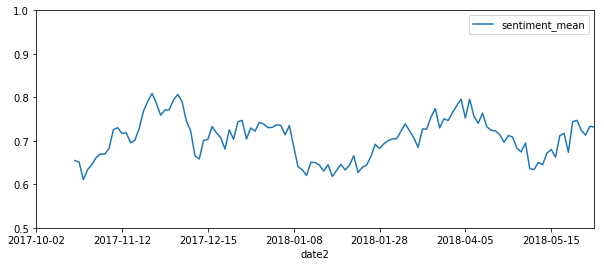

In [158]:
%matplotlib inline 

df_sub = df[df.pname == plist[1]]
df_sub = df_sub[df.date2 >= '2017-10-01' ]
df_sub['sentiment_mean'] = pd.rolling_mean(df_sub['sentiment'], 10)

df_sub.plot.line(x='date2', y='sentiment_mean', figsize=(10, 4), ylim = [0.5, 1.0])

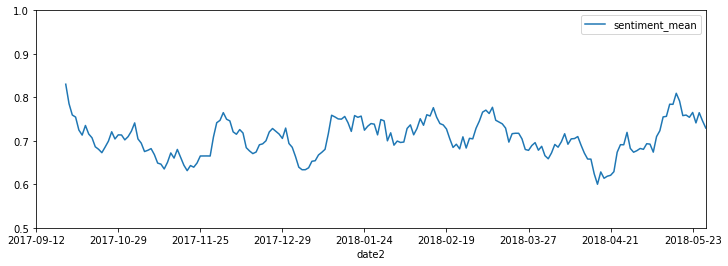

In [194]:
df_sub = df[df.pname == plist[0]]
# df_sub = df_sub[df.date2 >= '2018-01-10' ]
df_sub['sentiment_mean'] = pd.rolling_mean(df_sub['sentiment'], 10)

df_sub.plot.line(x='date2', y='sentiment_mean', figsize=(12, 4), ylim=[0.5, 1.0])

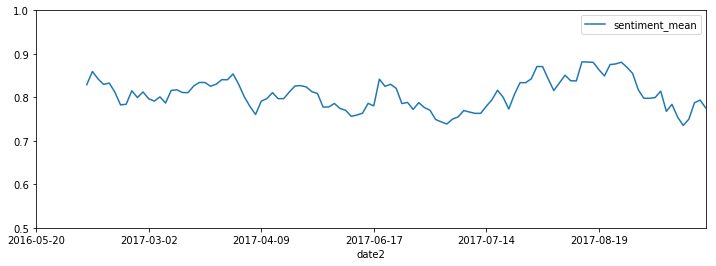

In [192]:
df_sub = df[df.pname == plist[2]]
df_sub = df_sub[df.date2 <= '2018-01-10' ]
df_sub['sentiment_mean'] = pd.rolling_mean(df_sub['sentiment'], 10)

df_sub.plot.line(x='date2', y='sentiment_mean', figsize=(12, 4), ylim=[0.5, 1.0]) 

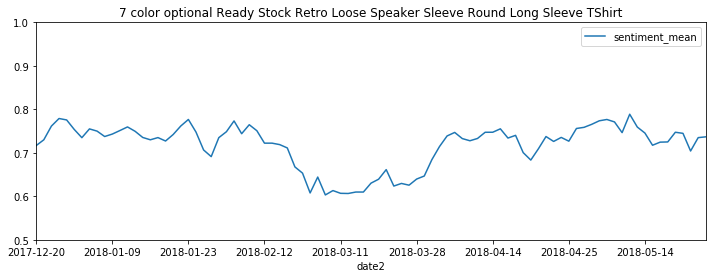

In [199]:
df_sub = df[df.pname == plist[4]]
df_sub['sentiment_mean'] = pd.rolling_mean(df_sub['sentiment'], 10)
df_sub = df_sub[df.date2 >= '2017-12-20' ]

text = re.sub(r'[^a-zA-Z0-9\[\]\-\s\(\)\!]',' ', plist[4])
df_sub.plot.line(x='date2', y='sentiment_mean', figsize=(12, 4), ylim=[0.5, 1.0], title = text) 

In [164]:
plist[4]

'7 color optional Ready Stock！Retro Loose Speaker Sleeve Round Long Sleeve TShirt'

In [204]:
out = {}

# for pid in [plist[4]]:
for pid in plist:    
    
    df_sub = df[df.pname == pid]
    df_sub['sentiment_mean'] = pd.rolling_mean(df_sub['sentiment'], 10)
    df_sub.dropna(inplace=True)
    # df_sub = df_sub[df.date2 >= '2017-12-20' ]

    dates = df_sub['date2'].tolist()
    prices = df_sub['sentiment_mean'].tolist()
    dict_tmp = {
        'date': dates,
        'score': [round(i, 4) for i in prices]
    }
    
    text = re.sub(r'[^a-zA-Z0-9\[\]\-\s\(\)\!]',' ', pid)
    text = re.sub(r'\s+', ' ', text).strip()
    out[text] = dict_tmp
    # out.append(dict_tmp)
    
print(len(out))

10


In [205]:
out.keys()

dict_keys(['READY STOCK oversized tee basic t-shirts koreanfashion simple white blouse', 'Ready STOCK hot sale loose short sleeves show slim summer girl', 'BUY 4 FREE 1 MUNAFIE SEAMLESS SLIMMING PANTIES', '[READY STOCK] (Best Seller!!) JYUNEESG S Loose fit Basic High Neck TOP', '7 color optional Ready Stock Retro Loose Speaker Sleeve Round Long Sleeve TShirt', 'White shirt female long sleeve han fan wide loose south Korean shirt', 'MONTIFS Strap Culottes - Multi Color', 'Silicone Nipple Cover Sticker Pads Shields Guard for Gown', '[READY STOK] BL-B-06 Knitted Turtle Neck T-Shirt Top', 'HOT Women Warm Winter Thick Footless Tights Skinny Slim Leggings Stretch Pants'])

In [207]:
import json
with open('sentiment_final_top10_trim.json', 'w') as outfile:
    json.dump(out, outfile)